In [1]:
import geopandas as gpd
import pandas as pd
import osmnx as ox
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString

In [2]:
# Specify the name that is used to seach for the data
place_name = "Helsinki, Finland"

In [3]:
# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name)

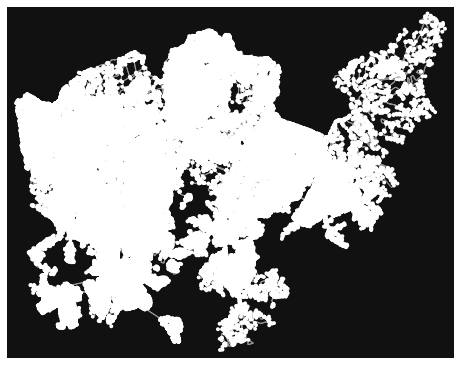

In [4]:
# Plot the streets
fig, ax = ox.plot_graph(graph)

In [5]:
# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)

In [6]:
# List key-value pairs for tags such as restaurants
tags = {'amenity': 'restaurant'}

In [7]:
# Retrieve restaurants
restaurants = ox.geometries_from_place(place_name, tags)

# How many restaurants do we have?
len(restaurants)

1111

In [8]:
# getting centroids from restaurants to avoid polygon geometric objects
restaurants['geometry'] = [geom.centroid for geom in restaurants['geometry']]

# reset index
restaurants = restaurants.reset_index(drop=True)

In [9]:
restaurants.head()

,amenity,contact:website,cuisine,name,opening_hours,geometry,diet:kosher,diet:vegan,diet:vegetarian,toilets:wheelchair,...,name:de,payment:mobile_pay,nodes,building,building:levels,architect,seamark:small_craft_facility:category,seamark:type,toilet,leisure
0,restaurant,http://www.pikkuranska.com/,french,Pikku Ranska,Mo-Th 10:30-22:15; Fr 11:00-23:00; Sa 12:00-23:00,POINT (24.86684 60.20897),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,restaurant,NaN,NaN,Ravintola Seurasaari,NaN,POINT (24.88337 60.18118),no,yes,yes,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,restaurant,NaN,nepalese,Nepalainen Ravintola Sunkosi,NaN,POINT (25.04248 60.20666),no,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,restaurant,NaN,NaN,Treffi Pub & Bistro,NaN,POINT (25.03057 60.19532),no,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,restaurant,NaN,NaN,Wanha Mylly,Tu-Th 11:00-20:00; Fr 11:00-22:00; Sa 12:00-22...,POINT (25.04174 60.19036),no,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# read the stops
stops = pd.read_csv(r'gtfs/stops.txt', sep=',')

In [11]:
stops.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,wheelchair_boarding,platform_code,vehicle_type
0,1010107,H2014,Meritullinkatu,Liisankatu,60.174128,24.955551,A,http://aikataulut.hsl.fi/pysakit/fi/1010107.html,0,,2,,3
1,1010108,H2013,Meritullinkatu,Liisankatu,60.174247,24.957960,A,http://aikataulut.hsl.fi/pysakit/fi/1010108.html,0,,2,,3
2,1010109,H2016,Liisanpuistikko,Liisankatu,60.174280,24.960710,A,http://aikataulut.hsl.fi/pysakit/fi/1010109.html,0,,2,,3
3,1010110,H2015,Liisanpuistikko,Liisankatu 1,60.174330,24.960230,A,http://aikataulut.hsl.fi/pysakit/fi/1010110.html,0,,2,,3
4,1010124,H0454,Snellmaninkatu,Liisankatu 20,60.174010,24.952360,A,http://aikataulut.hsl.fi/pysakit/fi/1010124.html,0,,2,,3


In [12]:
# creating geodataframe of stops
stops['geometry'] = None

stops_gdf = gpd.GeoDataFrame(stops, geometry = 'geometry', crs=4326)

stops_gdf['geometry'] = [Point(lon, lat) for lon, lat in zip(stops_gdf['stop_lon'], stops_gdf['stop_lat'])]

stops_gdf.head()


,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,wheelchair_boarding,platform_code,vehicle_type,geometry
0,1010107,H2014,Meritullinkatu,Liisankatu,60.174128,24.955551,A,http://aikataulut.hsl.fi/pysakit/fi/1010107.html,0,,2,,3,POINT (24.95555 60.17413)
1,1010108,H2013,Meritullinkatu,Liisankatu,60.174247,24.957960,A,http://aikataulut.hsl.fi/pysakit/fi/1010108.html,0,,2,,3,POINT (24.95796 60.17425)
2,1010109,H2016,Liisanpuistikko,Liisankatu,60.174280,24.960710,A,http://aikataulut.hsl.fi/pysakit/fi/1010109.html,0,,2,,3,POINT (24.96071 60.17428)
3,1010110,H2015,Liisanpuistikko,Liisankatu 1,60.174330,24.960230,A,http://aikataulut.hsl.fi/pysakit/fi/1010110.html,0,,2,,3,POINT (24.96023 60.17433)
4,1010124,H0454,Snellmaninkatu,Liisankatu 20,60.174010,24.952360,A,http://aikataulut.hsl.fi/pysakit/fi/1010124.html,0,,2,,3,POINT (24.95236 60.17401)


In [13]:
# Clip stops from the area of interest
stops_mask = gpd.clip(stops_gdf, area)


In [14]:
len(stops_mask)

2722

(60.1, 60.3)

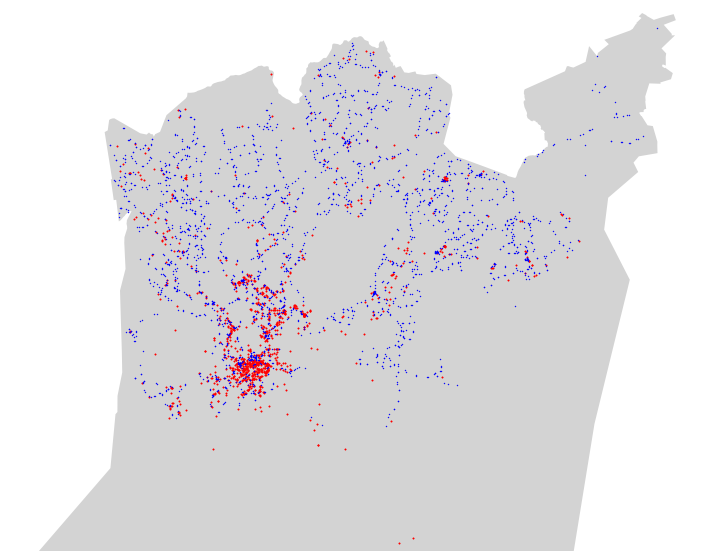

In [15]:
plt.style.use('seaborn')

fig, ax = plt.subplots(figsize=(14,10))

area.plot(ax=ax, facecolor = 'lightgray')

restaurants.plot(ax=ax, markersize = 2.5, color = 'red')

stops_mask.plot(ax=ax, markersize = 1.2, color = 'blue')

ax.axis('off')

plt.ylim(60.1, 60.3)

### Let's prepare some functions

In [16]:
from sklearn.neighbors import BallTree
import numpy as np

In [17]:
def get_nearest(src_points, candidates, k_neighbors=1):
    """Find nearest neighbors for all source points from a set of candidate points"""

    # Create tree from the candidate points
    tree = BallTree(candidates, leaf_size=15, metric='haversine')

    # Find closest points and distances
    distances, indices = tree.query(src_points, k=k_neighbors)

    # Transpose to get distances and indices into arrays
    distances = distances.transpose()
    indices = indices.transpose()

    # Get closest indices and distances (i.e. array at index 0)
    # note: for the second closest points, you would take index 1, etc.
    closest = indices[0]
    closest_dist = distances[0]

    # Return indices and distances
    return (closest, closest_dist)


def nearest_neighbor(left_gdf, right_gdf, return_dist=False):
    """
    For each point in left_gdf, find closest point in right GeoDataFrame and return them.
    
    NOTICE: Assumes that the input Points are in WGS84 projection (lat/lon).
    """
    
    left_geom_col = left_gdf.geometry.name
    right_geom_col = right_gdf.geometry.name
    
    # Ensure that index in right gdf is formed of sequential numbers
    right = right_gdf.copy().reset_index(drop=True)
    
    # Parse coordinates from points and insert them into a numpy array as RADIANS
    # Notice: should be in Lat/Lon format 
    left_radians = np.array(left_gdf[left_geom_col].apply(lambda geom: (geom.y * np.pi / 180, geom.x * np.pi / 180)).to_list())
    right_radians = np.array(right[right_geom_col].apply(lambda geom: (geom.y * np.pi / 180, geom.x * np.pi / 180)).to_list())
    
    # Find the nearest points
    # -----------------------
    # closest ==> index in right_gdf that corresponds to the closest point
    # dist ==> distance between the nearest neighbors (in meters)
    
    closest, dist = get_nearest(src_points=left_radians, candidates=right_radians)

    # Return points from right GeoDataFrame that are closest to points in left GeoDataFrame
    closest_points = right.loc[closest]
    
    # Ensure that the index corresponds the one in left_gdf
    closest_points = closest_points.reset_index(drop=True)
    
    # Add distance if requested 
    if return_dist:
        # Convert to meters from radians
        earth_radius = 6371000  # meters
        closest_points['distance'] = dist * earth_radius
        
    return closest_points

In [18]:
# Find closest public transport stop for each building and get also the distance based on haversine distance 
# Note: haversine distance which is implemented here is a bit slower than using e.g. 'euclidean' metric 
# but useful as we get the distance between points in meters
closest_stops = nearest_neighbor(restaurants, stops_mask, return_dist=True)

# And the result looks like ..
closest_stops

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,wheelchair_boarding,platform_code,vehicle_type,geometry,distance
0,1304133,H1427,Ulvilantie 21,Ulvilantie 21,60.209100,24.866820,A,http://aikataulut.hsl.fi/pysakit/fi/1304133.html,0,,2,,3,POINT (24.86682 60.20910),14.692910
1,1150130,H1302,Seurasaari,Seurasaarentie,60.188540,24.885750,A,http://aikataulut.hsl.fi/pysakit/fi/1150130.html,0,,2,,3,POINT (24.88575 60.18854),828.580972
2,1431131,H4179,Näätätie,Siilitie,60.207053,25.041649,B,http://aikataulut.hsl.fi/pysakit/fi/1431131.html,0,,2,,3,POINT (25.04165 60.20705),63.568600
3,1431111,H4040,Herttoniemi (M),Herttoniemi(M),60.195080,25.030830,B,http://aikataulut.hsl.fi/pysakit/fi/1431111.html,0,1000013,0,8,3,POINT (25.03083 60.19508),30.811731
4,1434169,H4039,Linnanrakentajantie,Linnanrakentajantie,60.191330,25.039760,B,http://aikataulut.hsl.fi/pysakit/fi/1434169.html,0,,2,,3,POINT (25.03976 60.19133),153.452219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,1301143,H0127,Saunalahdentie,Saunalahdentie,60.194506,24.872621,A,http://aikataulut.hsl.fi/pysakit/fi/1301143.html,0,,2,,3,POINT (24.87262 60.19451),78.415718
1107,1510107,H4116,Santahamina,Santahamina,60.145980,25.039650,B,http://aikataulut.hsl.fi/pysakit/fi/1510107.html,0,,0,,3,POINT (25.03965 60.14598),4723.368626
1108,1040125,H1213,Kampintori,Fredrikinkatu 55,60.167258,24.932995,A,http://aikataulut.hsl.fi/pysakit/fi/1040125.html,0,,2,,3,POINT (24.93299 60.16726),57.690475
1109,1204401,H0827,Eiranranta,Hernesaarenranta,60.153781,24.930590,A,http://aikataulut.hsl.fi/pysakit/fi/1204401.html,0,,0,,0,POINT (24.93059 60.15378),181.137802


In [19]:
# Now we should have exactly the same number of closest_stops as we have buildings
print(len(closest_stops), '==', len(restaurants))

1111 == 1111


In [20]:
# Rename the geometry of closest stops gdf so that we can easily identify it
closest_stops_geom = closest_stops.rename(columns={'geometry': 'closest_stop_geom'})

# Merge the datasets by index (for this, it is good to use '.join()' -function)
restaurants = restaurants.join(closest_stops_geom)

# Let's see what we have
restaurants.head()

,amenity,contact:website,cuisine,name,opening_hours,geometry,diet:kosher,diet:vegan,diet:vegetarian,toilets:wheelchair,...,stop_lon,zone_id,stop_url,location_type,parent_station,wheelchair_boarding,platform_code,vehicle_type,closest_stop_geom,distance
0,restaurant,http://www.pikkuranska.com/,french,Pikku Ranska,Mo-Th 10:30-22:15; Fr 11:00-23:00; Sa 12:00-23:00,POINT (24.86684 60.20897),NaN,NaN,NaN,NaN,...,24.866820,A,http://aikataulut.hsl.fi/pysakit/fi/1304133.html,0,,2,,3,POINT (24.86682 60.20910),14.692910
1,restaurant,NaN,NaN,Ravintola Seurasaari,NaN,POINT (24.88337 60.18118),no,yes,yes,yes,...,24.885750,A,http://aikataulut.hsl.fi/pysakit/fi/1150130.html,0,,2,,3,POINT (24.88575 60.18854),828.580972
2,restaurant,NaN,nepalese,Nepalainen Ravintola Sunkosi,NaN,POINT (25.04248 60.20666),no,NaN,NaN,NaN,...,25.041649,B,http://aikataulut.hsl.fi/pysakit/fi/1431131.html,0,,2,,3,POINT (25.04165 60.20705),63.568600
3,restaurant,NaN,NaN,Treffi Pub & Bistro,NaN,POINT (25.03057 60.19532),no,NaN,NaN,NaN,...,25.030830,B,http://aikataulut.hsl.fi/pysakit/fi/1431111.html,0,1000013,0,8,3,POINT (25.03083 60.19508),30.811731
4,restaurant,NaN,NaN,Wanha Mylly,Tu-Th 11:00-20:00; Fr 11:00-22:00; Sa 12:00-22...,POINT (25.04174 60.19036),no,NaN,NaN,NaN,...,25.039760,B,http://aikataulut.hsl.fi/pysakit/fi/1434169.html,0,,2,,3,POINT (25.03976 60.19133),153.452219


In [21]:
restaurants['distance'].describe()

count    1111.000000
mean      114.611125
std       229.082965
min         2.780794
25%        46.962078
50%        85.723569
75%       123.970587
max      4813.424377
Name: distance, dtype: float64

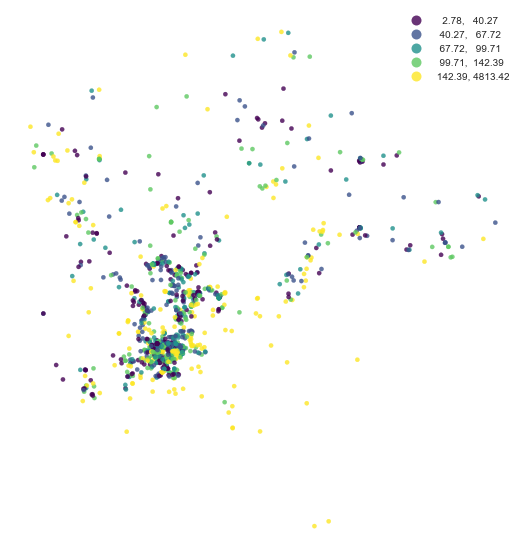

In [22]:
ax = restaurants.plot(column='distance', markersize=18, cmap = 'viridis', alpha=0.8, figsize=(10,10), scheme='quantiles', k=5, 
               legend=True)
ax.axis('off');

In [23]:
# Create a link (LineString) between building and stop points
restaurants['link'] = restaurants.apply(lambda row: LineString([row['geometry'], row['closest_stop_geom']]), axis=1)

# Set link as the active geometry
restaurants_links = restaurants.copy()
restaurants_links = restaurants_links.set_geometry('link')

In [24]:
restaurants_links.dtypes

amenity                object
contact:website        object
cuisine                object
name                   object
opening_hours          object
                       ...   
platform_code          object
vehicle_type            int64
closest_stop_geom    geometry
distance              float64
link                 geometry
Length: 200, dtype: object

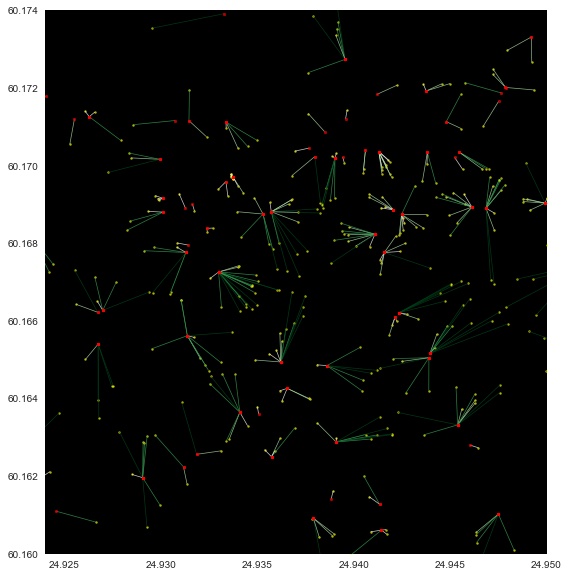

In [25]:
# Plot the connecting links between buildings and stops and color them based on distance
ax = restaurants_links.plot(column='distance', cmap='Greens', scheme='quantiles', k=4, alpha=0.8, lw=0.7, figsize=(13, 10))
ax = restaurants.plot(ax=ax, color='yellow', markersize=4, alpha=0.7)
ax = closest_stops.plot(ax=ax, markersize=8, marker='o', color='red', alpha=0.7, zorder=3)

# Zoom closer
ax.set_xlim([24.924, 24.95])
ax.set_ylim([60.16, 60.1740])


# Set map background color to black, which helps with contrast
ax.set_facecolor('black')

plt.grid(False)

In [26]:
links = restaurants_links[['distance','link']]
links.to_file(r'links.geojson', driver='GeoJSON')

In [27]:
resta = restaurants[['amenity','geometry']]
resta.to_file(r'restaurants.geojson', driver='GeoJSON')

In [28]:
stops_linked = closest_stops[['stop_name','geometry']]
stops_linked.to_file(r'bus_stops.geojson', driver='GeoJSON')